<a href="https://colab.research.google.com/github/charurathour/Data-science-projects/blob/main/CNN_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mdwaquarazam/agricultural-crops-image-classification/versions/1


In [9]:
import os
dataset_path='/root/.cache/kagglehub/datasets/mdwaquarazam/agricultural-crops-image-classification/versions/1'
print(os.listdir(dataset_path))

['Agricultural-crops']


In [10]:
!pip install tensorflow
!pip install split-folders

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models

In [15]:
input_folder=dataset_path+'/Agricultural-crops'

In [16]:
output_folder=dataset_path+'/ImageRecognition'

In [17]:
split_ratio=(0.8,0.1,0.1)

splitfolders.ratio(input_folder,
                   output=output_folder,
                   seed=500,
                   ratio=split_ratio,
                   group_prefix=None)

Copying files: 829 files [00:01, 556.33 files/s]


In [18]:
#define the parameters
img_size=(224,224)
batch_size=32

In [19]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [20]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_dir =os.path.join(output_folder, 'train')
test_dir =os.path.join(output_folder, 'test')
valid_dir =os.path.join(output_folder, 'val')

In [22]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=img_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=img_size,
                                           batch_size=batch_size,
                                           class_mode='categorical')
valid_data=valid_datagen.flow_from_directory(valid_dir,
                                             target_size=img_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


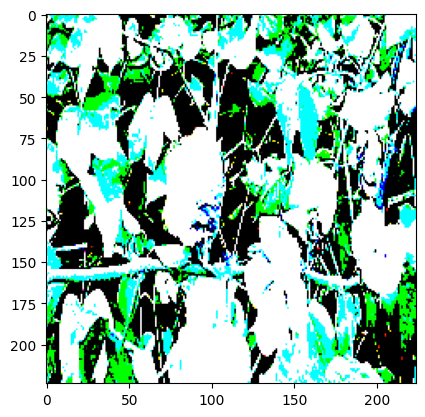

In [24]:
import random
images, labels =next(valid_data)

idx=random.randint(0,images.shape[0] - 1)

plt.imshow(images[idx])
plt.show()

In [26]:
from keras.applications import ResNet50

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [27]:
base_model.trainable=False

In [29]:
model=models.Sequential([base_model,
                         layers.GlobalAveragePooling2D(),
                         layers.Dense(128,activation='relu'),
                         layers.Dropout(0.5),
                         layers.Dense(30,activation='softmax')])

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(train_data, epochs=25,validation_data=valid_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.0738 - loss: 3.8848 - val_accuracy: 0.2917 - val_loss: 2.7868
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.1717 - loss: 2.8593 - val_accuracy: 0.4028 - val_loss: 2.2204
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.2887 - loss: 2.4812 - val_accuracy: 0.4861 - val_loss: 1.7826
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 147s 7s/step - accuracy: 0.3819 - loss: 2.2142 - val_accuracy: 0.6250 - val_loss: 1.5220
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 149s 7s/step - accuracy: 0.4535 - loss: 1.8994 - val_accuracy: 0.6944 - val_loss: 1.3753
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 150s 7s/step - accuracy: 0.5112 - loss: 1.7571 - val_accuracy: 0.6667 - val_loss: 1.2362
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.5314 - loss: 1.6548 - val_accuracy: 0.7361 - val_loss: 1.0634
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.6051 - loss: 1.3772 - val_accuracy: 0.7778 - v

In [32]:
test_loss, test_accuracy= model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.7895 - loss: 0.6983
Test accuracy: 0.7809523940086365


In [33]:
class_names = {0: 'Cherry',
 1: 'Coffee-plant',
 2: 'Cucumber',
 3: 'Fox_nut(Makhana)',
 4: 'Lemon',
 5: 'Olive-tree',
 6: 'Pearl_millet(bajra)',
 7: 'Tobacco-plant',
 8: 'almond',
 9: 'banana',
 10: 'cardamom',
 11: 'chilli',
 12: 'clove',
 13: 'coconut',
 14: 'cotton',
 15: 'gram',
 16: 'jowar',
 17: 'jute',
 18: 'maize',
 19: 'mustard-oil',
 20: 'papaya',
 21: 'pineapple',
 22: 'rice',
 23: 'soyabean',
 24: 'sugarcane',
 25: 'sunflower',
 26: 'tea',
 27: 'tomato',
 28: 'vigna-radiati(Mung)',
 29: 'wheat'}

In [43]:
import os
def predict_img(image,model):
  test_img=cv2.imread(image)

  print(os.path.exists(image))
  test_img=cv2.resize(test_img,(224,224))
  test_img=np.expand_dims(test_img,axis=0)
  test_img=preprocess_input(test_img)
  result=model.predict(test_img)
  r=np.argmax(result)
  print(class_names[r])

In [44]:
predict_img(test_dir+'/clove/image4.jpeg', model)

True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
clove
